In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import random
import itertools
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
genres = {'metal': 0, 'disco': 1, 'classical': 2, 'hiphop': 3, 'jazz': 4, 
          'country': 5, 'pop': 6, 'blues': 7, 'reggae': 8, 'rock': 9}

In [3]:
df = pd.read_csv('data/gtzan_features.csv')
df.head()

,centroid_kurtosis,centroid_mean,centroid_skew,centroid_std,flux_kurtosis,flux_mean,flux_skew,flux_std,genre,mfcc_0_kurtosis,...,rmse_std,roloff_kurtosis,roloff_mean,roloff_skew,roloff_std,tempo,zcr_kurtosis,zcr_mean,zcr_skew,zcr_std
0,1.277930,3176.995746,0.851571,550.485825,4.268698,1.131944,1.844055,0.640262,0,0.492081,...,0.020419,-0.180793,6235.702536,0.740059,1316.782580,95.703125,0.427356,0.183035,0.210292,0.053053
1,7.136744,2850.163030,1.872261,450.508356,6.209002,1.104693,2.247360,0.689680,0,-0.014180,...,0.017282,3.561296,5926.993343,1.291193,852.511470,151.999081,5.195550,0.152820,1.238239,0.046267
2,3.603367,2147.049597,1.476032,394.428946,7.961967,1.156895,2.375121,0.801254,0,0.685361,...,0.028277,1.952754,4376.752601,1.401493,842.133273,112.347147,3.958750,0.128326,1.088163,0.034394
3,-0.256259,2700.584556,0.124371,411.301524,4.641896,1.165081,1.818542,0.663197,0,0.039609,...,0.035954,-0.233782,5178.110839,0.240711,679.032203,99.384014,0.094853,0.166672,0.183645,0.053765
4,1.316912,3357.385889,0.691435,548.509155,6.928385,1.263426,1.851731,0.848756,0,19.288096,...,0.013262,-0.009224,6810.304320,0.129295,964.532861,135.999178,0.857290,0.192344,0.625120,0.056690


In [4]:
X = df.drop(columns=['genre']).values
y = df['genre'].ravel()

In [5]:
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [6]:
A = []
cm = 0

In [7]:
for z in range(5):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=int(random.random()), stratify=y)

    pkl_filename = "model/cart.pkl"
    with open(pkl_filename, 'rb') as file:  
        pickle_model = pickle.load(file)

    res_cart = pickle_model.predict(X_test)

    pkl_filename = "model/lr.pkl"
    with open(pkl_filename, 'rb') as file:  
        pickle_model = pickle.load(file)

    res_lr = pickle_model.predict(X_test)

    pkl_filename = "model/rf.pkl"
    with open(pkl_filename, 'rb') as file:  
        pickle_model = pickle.load(file)

    res_rf = pickle_model.predict(X_test)

    pkl_filename = "model/svm.pkl"
    with open(pkl_filename, 'rb') as file:  
        pickle_model = pickle.load(file)

    res_svm = pickle_model.predict(X_test)

    y_pred = np.zeros(300, dtype=int)
    k = 0
    for i in range(300):
        t = np.array([res_cart[i], res_lr[i], res_rf[i], res_svm[i]])
        if np.array_equal(np.unique(t), t):
            y_pred[i] = t[2]
        else:
            y_pred[i] = np.bincount(t).argmax()
        t = np.delete(t, np.s_[:])
    cm += confusion_matrix(y_test, y_pred)
    print("Round ", z+1, "of 5: ", round(accuracy_score(y_test, y_pred)*100, 2))
    A.append(round(accuracy_score(y_test, y_pred)*100, 2))

Round  1 of 5:  88.67
Round  2 of 5:  88.67
Round  3 of 5:  88.67
Round  4 of 5:  88.67
Round  5 of 5:  88.67


In [8]:
A = np.asarray(A)
print("Mean Accuracy: ", np.average(A))

Mean Accuracy:  88.67


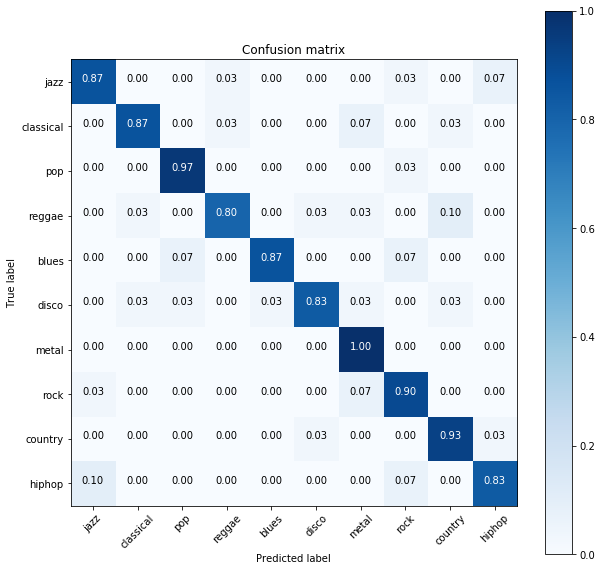

In [9]:
plot_confusion_matrix(cm, genres.keys(), normalize=True)